In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00038.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_01005.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00045.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00005.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00055.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00053.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00008.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00995.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_01019.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_

/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/208.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/45.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/56.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/89.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/20.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/275.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/212.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/239.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/58.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/6.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/109.jpg
/kaggle/input/covid-face-mas

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/'
test_dir = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Test/'
validation_dir = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/'

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [4]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_mask_names[:10])

['0733.jpg', '0125.jpeg', '0498.jpg', '1383.jpg', '1626.jpg', '0273.jpg', '1339.jpg', '0748.jpg', '1340.jpg', '1173.jpg']
['0733.jpg', '0125.jpeg', '0498.jpg', '1383.jpg', '1626.jpg', '0273.jpg', '1339.jpg', '0748.jpg', '1340.jpg', '1173.jpg']


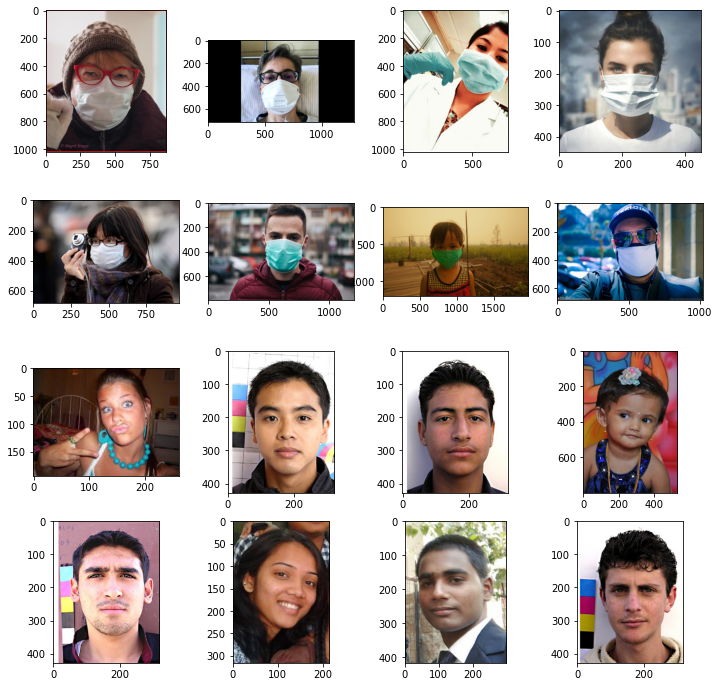

In [5]:
import matplotlib.image as mpimg

cols = 4
rows = 4

plt.figure(figsize = (12,12))

mask_pic = []

for i in train_mask_names[0:8]:
    mask_pic.append(os.path.join(train_mask_dir, i))
    
no_mask_pic = []
for i in train_nomask_names[0:8]:
    no_mask_pic.append(os.path.join(train_nomask_dir, i))

merged_list = mask_pic + no_mask_pic

for i in range(len(merged_list)):
    plt.subplot(rows, cols, i+1)
    image = mpimg.imread(merged_list[i])
    plt.imshow(image, cmap='gray')
    
plt.show()

In [7]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1. / 255)
validation_data_gen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_data_gen.flow_from_directory(train_dir, target_size = (150, 150), batch_size=32, class_mode='binary')
test_generator = test_data_gen.flow_from_directory(test_dir, target_size = (150, 150), batch_size=32, class_mode='binary')
validation_generator = validation_data_gen.flow_from_directory(test_dir, target_size = (150, 150), batch_size=32, class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [9]:
train_generator.image_shape

(150, 150, 3)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [11]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
19/19 [==============================] - 27s 1s/step - loss: 5.5429 - accuracy: 0.4835 - val_loss: 0.6927 - val_accuracy: 0.5800
Epoch 2/30
19/19 [==============================] - 20s 1s/step - loss: 0.6426 - accuracy: 0.6458 - val_loss: 0.6889 - val_accuracy: 0.6400
Epoch 3/30
19/19 [==============================] - 20s 1s/step - loss: 0.5052 - accuracy: 0.8170 - val_loss: 0.5763 - val_accuracy: 0.7700
Epoch 4/30
19/19 [==============================] - 20s 1s/step - loss: 0.3756 - accuracy: 0.8331 - val_loss: 0.4482 - val_accuracy: 0.8500
Epoch 5/30
19/19 [==============================] - 20s 1s/step - loss: 0.3088 - accuracy: 0.8766 - val_loss: 0.4154 - val_accuracy: 0.8800
Epoch 6/30
19/19 [==============================] - 20s 1s/step - loss: 0.2768 - accuracy: 0.8889 - val_loss: 0.3287 - val_accuracy: 0.9200
Epoch 7/30
19/19 [==============================] - 20s 1s/step - loss: 0.2305 - accuracy: 0.9175 - val_loss: 0.3568 - val_accuracy: 0.9300
Epoch 8/30
19/19 [==

Text(0.5, 0, 'epoch')

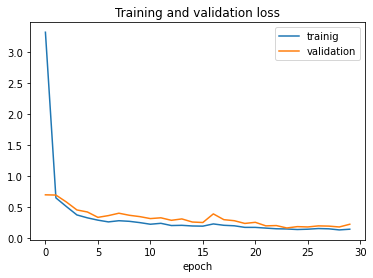

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

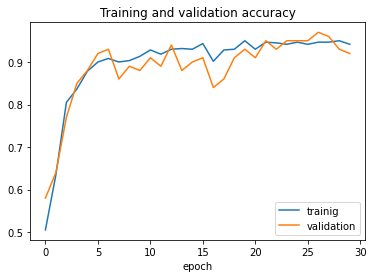

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))